<font size=6><b> lec03.머신러닝_전처리 : 범주형(categorical) 변수

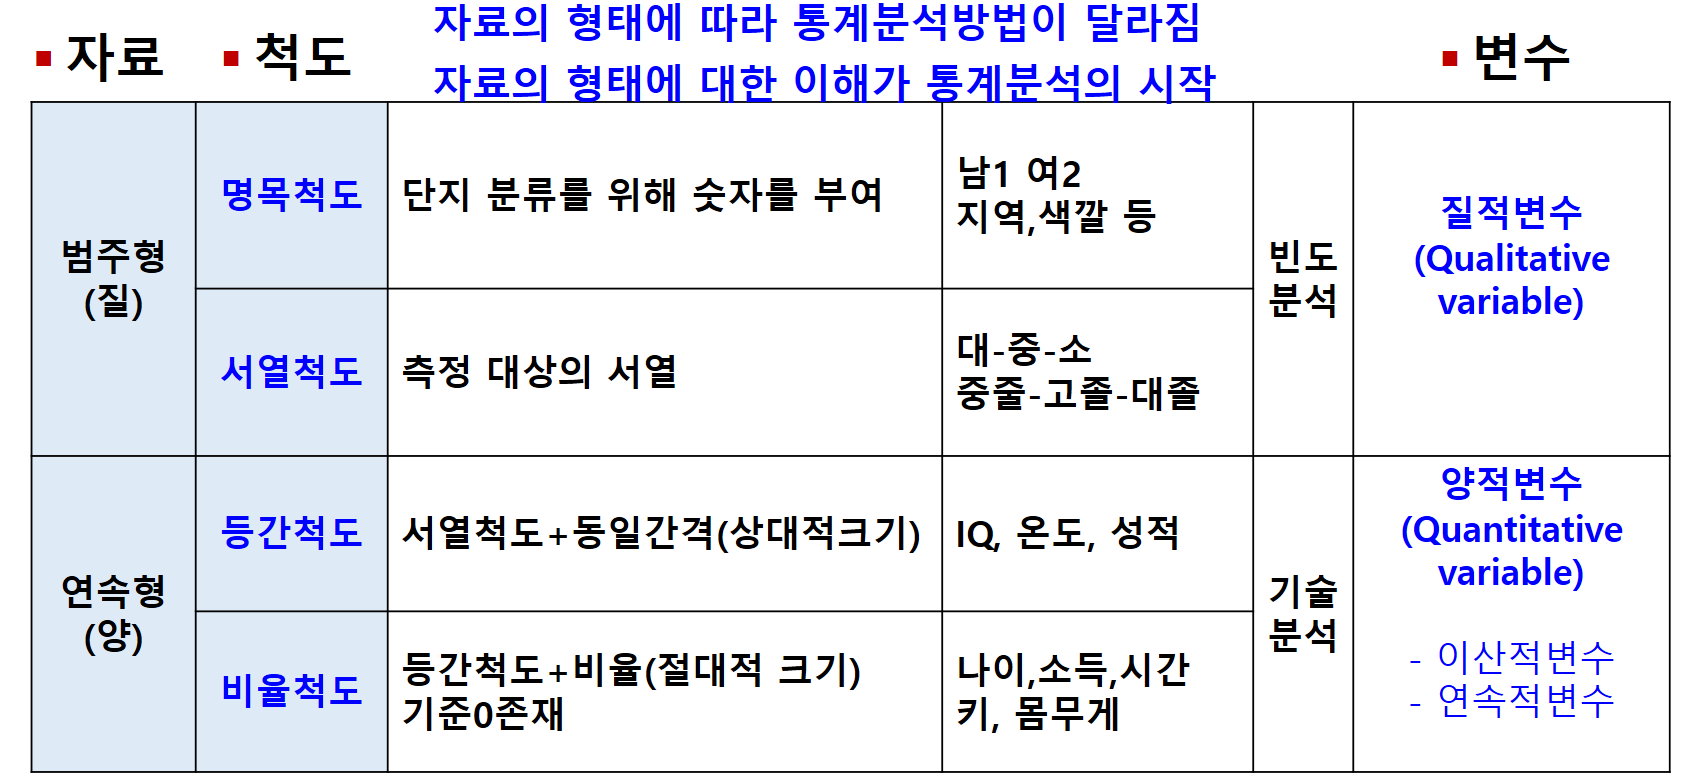

### 범주형 변수 categorical data 처리
* 라벨인코딩(Label Encoding)
* 원핫인코딩(One-hot Encoding)
* 범주화(Bining)

In [1]:
import numpy as np
import pandas as pd

> <font size=4><b>(1) 라벨인코딩(Label Encoding)
> * n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현

In [2]:
from sklearn.preprocessing import LabelEncoder

> <font size=4><b>(2) 원핫인코딩(One-hot Encoding)
> * 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 벡터 표현 방식
> *  데이터프레임에서 object 타입으로 되어있는 변수는 dummy 변수화
> * <font color=red><b> 판다스의 시리즈가 아닌 numpy 행렬을 입력해야함 → df['컬럼'].values
> * <font color=red><b> 벡터 입력을 허용하지 않음 → reshape(-1,1)을 이용해 Matrix로 변환  (N,) → (N,1)

In [3]:
from sklearn.preprocessing import OneHotEncoder

> <font size=4><b>(3) get_dummies() = 라벨인코딩(Label Encoding)+원핫인코딩(One-hot Encoding) + 결측처리

> <font size=4><b>(3) 범주화(Bining)
> * 연속형 데이터를 구간으로 나누어 범주화하는 방법

# 원핫인코딩

In [4]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [5]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False)

print(df["score"].shape)
print(df["score"])
print()
print(df["score"].values)
print(pd.unique(df["score"]))


(5,)
0      A
1      B
2    NaN
3      A
4      C
Name: score, dtype: object

['A' 'B' nan 'A' 'C']
['A' 'B' nan 'C']


* [STEP1]  reshape(-1,1)  --> 2D matrix

In [6]:
temp = df["score"].values.reshape(-1,1)
print(temp)
print(temp.shape)

[['A']
 ['B']
 [nan]
 ['A']
 ['C']]
(5, 1)


In [7]:
temp = df["score"].values.reshape(-1,1)
oh.fit(temp)  #----------------------------리턴이 없다 주의주의주의주의
oh_res = oh.transform(temp)
oh_res

C:\AI\pythonProject\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

* [STEP2]  인코딩 결과 프레임으로 바꾸기

In [8]:
print(oh.categories_)
print(type(oh.categories_))
print(oh.categories_[0])

[array(['A', 'B', 'C', nan], dtype=object)]
<class 'list'>
['A' 'B' 'C' nan]


In [9]:
ohdf = pd.DataFrame(oh_res,  columns=oh.categories_[0])
ohdf.head()

,A,B,C,NaN
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


* [STEP3]  원본 + 인코딩결과 프레임 합치기 (원핫 전 컬럼은 drop)

In [10]:
ohdf = pd.concat([df,  ohdf], axis=1)
ohdf.drop('score', axis=1, inplace=True)
ohdf.head()

,name,A,B,C,NaN
0,smith,1.0,0.0,0.0,0.0
1,martin,0.0,1.0,0.0,0.0
2,jones,0.0,0.0,0.0,1.0
3,allen,1.0,0.0,0.0,0.0
4,king,0.0,0.0,1.0,0.0


# 라벨인코딩

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

le.fit(df['score'])
le_res = le.transform(df['score'])
print(le_res)

[0 1 3 0 2]


In [13]:
le_res = le.fit_transform(df['score'])
print(le_res)

[0 1 3 0 2]


In [14]:
le_df = pd.DataFrame(le_res, columns=['le_col'])
le_df.head()


,le_col
0,0
1,1
2,3
3,0
4,2


In [15]:
le_df = pd.concat([df['score'], le_df], axis=1)
le_df.head()

,score,le_col
0,A,0
1,B,1
2,NaN,3
3,A,0
4,C,2


# pd.get_dummies(df)

* 전체

In [21]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [22]:
df = pd.get_dummies(df, dtype="int", dummy_na=True)
df

,name_allen,name_jones,name_king,name_martin,name_smith,name_nan,score_A,score_B,score_C,score_nan
0,0,0,0,0,1,0,1,0,0,0
1,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0


* 특정 피쳐

In [24]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [25]:
pd.get_dummies(df['score'], dtype="int")

,A,B,C
0,1,0,0
1,0,1,0
2,0,0,0
3,1,0,0
4,0,0,1


* <font size=4 color=red><b>아래 강추

In [26]:
pd.get_dummies(df, dtype="int", columns=['score'])

,name,score_A,score_B,score_C
0,smith,1,0,0
1,martin,0,1,0
2,jones,0,0,0
3,allen,1,0,0
4,king,0,0,1
